In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

In [2]:
from algorithms.meshforrectangle import MeshForRectangle

In [47]:
rectangle = [[0,0],[0,2],[1,2],[1,0]]
rectangle_area = 2
u = lambda x, y: (x - 1)**2 * (y - 2)**2 *x*y

In [46]:
nx = 10
ny = 10
mesher = MeshForRectangle(nx, ny)
triangulation = list(map(lambda t: t.get_points(), mesher.triangulate(rectangle)))

In [17]:
points = np.unique(np.concatenate(triangulation), axis=0).tolist()
triangles = list(map(lambda tri: [points.index(tri[0]),
                                  points.index(tri[1]),
                                  points.index(tri[2]),], triangulation))

In [82]:
#  def get_numeration_vertcies(triangulation):
#     points = {}

#     count = 1

#     for tr in triangulation:
#         if tr.p1 not in points.values():
#             points.update({count: tr.p1})
#             count += 1

#         if tr.p2 not in points.values():
#             points.update({count: tr.p2})
#             count += 1

#         if tr.p3 not in points.values():
#             points.update({count: tr.p3})
#             count += 1
#     return points

# res = get_numeration_vertcies(mesher.triangulate(rectangle))
# [print(el.get_coords()) for el in res.values()]

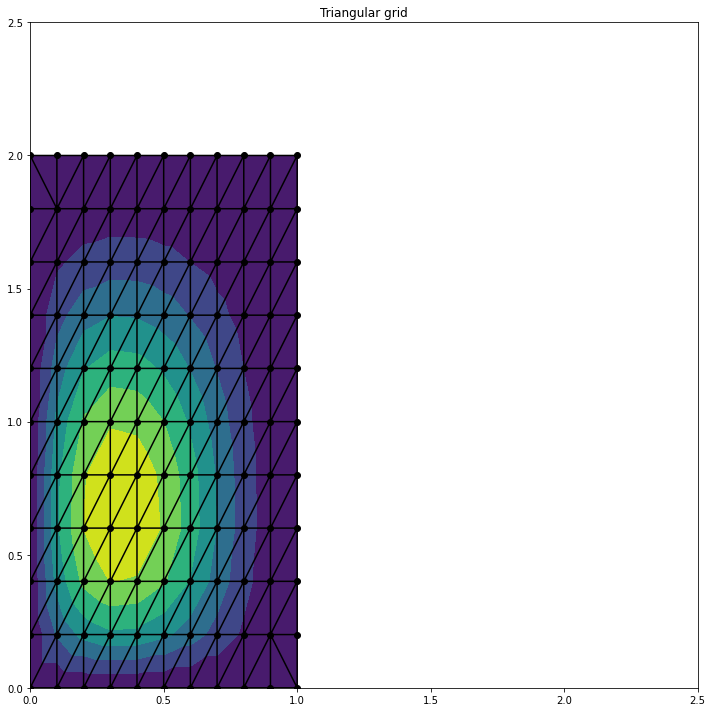

In [6]:
x, y = [l.ravel() for l in np.split(points, [-1], axis=1)]

triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = u(x,y)

xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

# Set up the figure
fig, ax = plt.subplots(figsize=(10,10))#plt.subplots(nrows=2, ncols=2)

plt.xlim(0, 2.5)
plt.ylim(0, 2.5)

# Plot the triangulation.
ax.tricontourf(triang, z)
ax.triplot(triang, 'ko-')
ax.set_title('Triangular grid')

fig.tight_layout()
plt.show()

In [62]:
n =  len(triangles)

triangle_area = rectangle_area / n
s = triangle_area / 3


a = np.zeros([n, 3])
b = np.zeros([n, 3])
c = np.zeros([n, 3])
phi = np.zeros([n, 3])
dN_x1 = np.zeros([n, 3])
dN_x2 = np.zeros([n, 3])



delta = 2 * s

for i, tri in enumerate(triangles):
    p1 = points[tri[0]]
    p2 = points[tri[1]] 
    p3 = points[tri[2]]

    groups = [
        (p1, p2, p3), (p1, p3, p2), (p2, p3, p1)
    ]
    
    for j, group in enumerate(groups):
        t1 = group[0]
        t2 = group[1]
        t3 = group[2]
        
        a[i][j] = t1[0] * t2[1] - t2[0] * t1[1]
        b[i][j] = t1[1] - t2[1]
        c[i][j] = t2[0] - t1[0]
        
        dN_x1[i][j] = 1/delta * b[i][j]
        dN_x2[i][j] = 1/delta * c[i][j]
        
# print(dN_x1)

In [75]:
print(triangles)
#0


[[0, 12, 1], [0, 11, 12], [1, 13, 2], [1, 12, 13], [2, 14, 3], [2, 13, 14], [3, 15, 4], [3, 14, 15], [4, 16, 5], [4, 15, 16], [5, 17, 6], [5, 16, 17], [6, 18, 7], [6, 17, 18], [7, 19, 8], [7, 18, 19], [8, 20, 9], [8, 19, 20], [9, 20, 10], [20, 21, 10], [11, 23, 12], [11, 22, 23], [12, 24, 13], [12, 23, 24], [13, 25, 14], [13, 24, 25], [14, 26, 15], [14, 25, 26], [15, 27, 16], [15, 26, 27], [16, 28, 17], [16, 27, 28], [17, 29, 18], [17, 28, 29], [18, 30, 19], [18, 29, 30], [19, 31, 20], [19, 30, 31], [20, 32, 21], [20, 31, 32], [22, 34, 23], [22, 33, 34], [23, 35, 24], [23, 34, 35], [24, 36, 25], [24, 35, 36], [25, 37, 26], [25, 36, 37], [26, 38, 27], [26, 37, 38], [27, 39, 28], [27, 38, 39], [28, 40, 29], [28, 39, 40], [29, 41, 30], [29, 40, 41], [30, 42, 31], [30, 41, 42], [31, 43, 32], [31, 42, 43], [33, 45, 34], [33, 44, 45], [34, 46, 35], [34, 45, 46], [35, 47, 36], [35, 46, 47], [36, 48, 37], [36, 47, 48], [37, 49, 38], [37, 48, 49], [38, 50, 39], [38, 49, 50], [39, 51, 40], [39, 

In [83]:
K = np.zeros([n, 3, 3])

for l in range(n):
    for i in range(3):
        for j in range(3):
            K[l][i][j] = b[l][i] * b[l][j] + c[l][i] * c[l][j]
K /= 4 * s


# [print(K[i]) for i in range(n)]